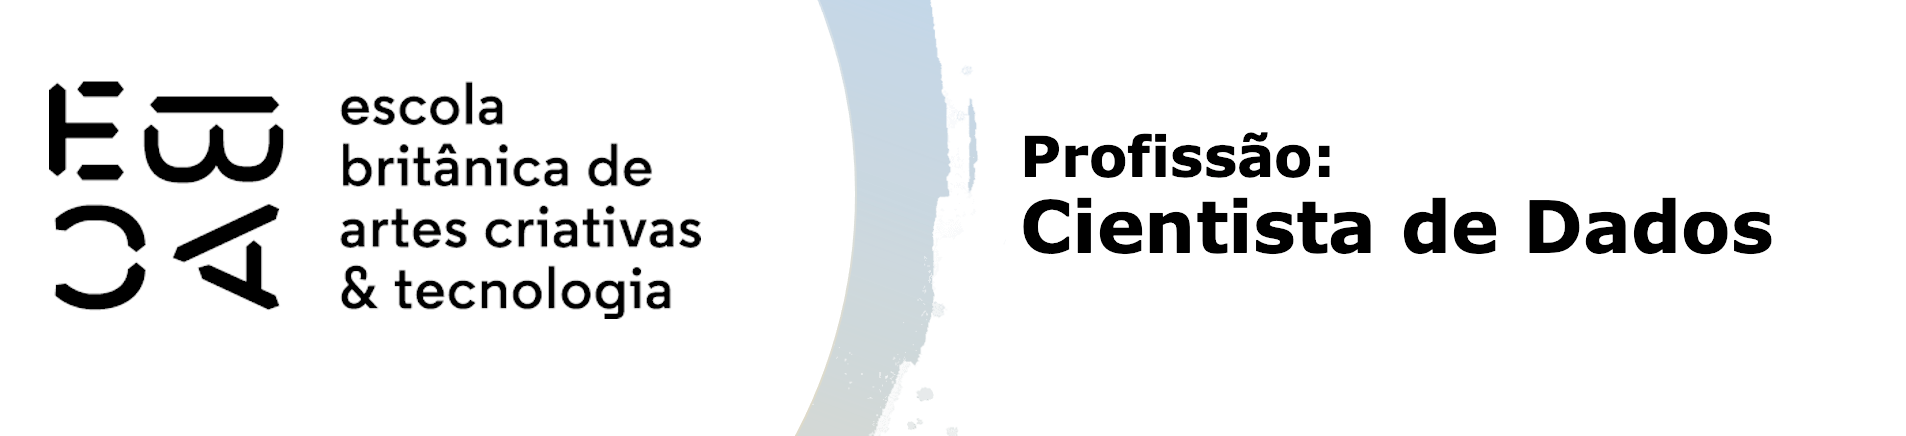

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [30]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [31]:
df = peng.select_dtypes(include='number').dropna()

In [32]:
df.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [33]:
padronizador = StandardScaler()

In [34]:
df_pad = padronizador.fit_transform(df)

In [35]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [37]:
clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [41]:
df['grupos'] = clus.labels_

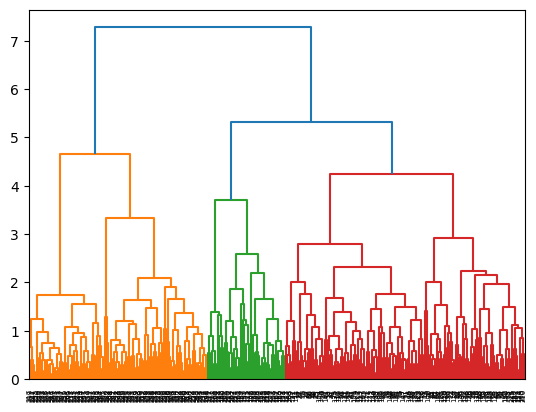

In [43]:
dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [48]:
pd.crosstab(peng['species'], df['grupos'])

grupos,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [63]:
pd.crosstab(peng['sex'], df['grupos'])

grupos,0,1,2
sex,,,
Female,58,87,20
Male,61,73,34


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

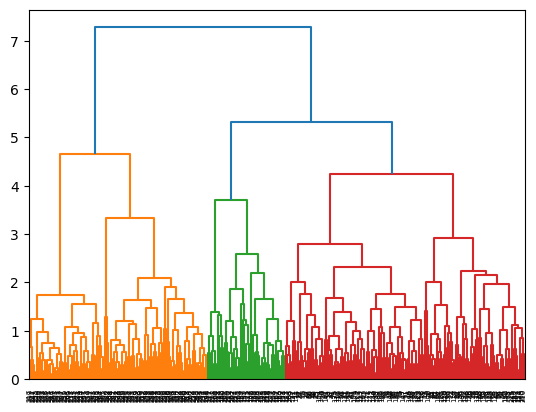

In [50]:
dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

In [53]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=5)

In [54]:
clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [55]:
df['grupos2'] = clus.labels_

In [58]:
pd.crosstab(peng['species'], df['grupos2'])

grupos2,0,1,2,3,4
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


In [64]:
pd.crosstab(peng['species'], df['grupos'])

grupos,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [62]:
pd.crosstab(peng['sex'], df['grupos2'])

grupos2,0,1,2,3,4
sex,,,,,
Female,20,9,13,49,74
Male,34,61,55,0,18


In [65]:
pd.crosstab(peng['sex'], df['grupos'])

grupos,0,1,2
sex,,,
Female,58,87,20
Male,61,73,34


O gentoo em sua maioria se tornou o grupo 1 e 3 , mas como podemos ver se dividiu entre macho e fêmea, o adelie é o grupo 2 e 4 que podemos ver na tabela cruzada que também teve uma grande diferenciação entre macho e fêmea, o Chinstrap é o grupo 0 e como só temos 5 grupos ficou dividido entre macho e fêmea em um único grupo, então podemos ver que aumentar o número de grupos de 3 para 5 possibilitou que tivessemos uma maior informação, fazendo os comparativos das tabelas cruzadas vimos que as espécies que anteriormente participavam em sua maioria cada uma de um grupo, foram divididas entre os grupos pelo sex, menos o Chinstrap que talvez se aumentássemos mais as divisões também faria o mesmo que os outros grupos